Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [2]:
import json
from urllib.request import urlopen
import pandas as pd


url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = urlopen(url)

# from url in data to json
data_json = json.loads(response.read())

#converting into datafame as main data is under the episodes keys in json format..
df = pd.DataFrame(data_json["_embedded"]["episodes"])

df.sample(3)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...
22,1800147,https://www.tvmaze.com/episodes/1800147/westwo...,The Absence of Field,3,3,regular,2020-03-29,21:00,2020-03-30T01:00:00+00:00,60,{'average': 7.8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>If you don't like what you see in the mirro...,{'self': {'href': 'https://api.tvmaze.com/epis...
28,2326389,https://www.tvmaze.com/episodes/2326389/westwo...,The Auguries,4,1,regular,2022-06-26,21:00,2022-06-27T01:00:00+00:00,55,{'average': 7.1},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Hello again. Don't worry about a thing. It'...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [3]:
df['rating'].sample(2)

5       {'average': 8}
32    {'average': 7.8}
Name: rating, dtype: object

In [4]:
df['rating'] = df['rating'].apply(pd.Series)['average']

In [5]:
df['rating'].sample(2)

16    7.9
28    7.1
Name: rating, dtype: float64

In [6]:
# ● Get all the overall ratings for each season and using plots compare the ratings for all the
# seasons, like season 1 ratings, season 2, and so on.
import matplotlib.pyplot as plt
import seaborn as sns

gr = df.groupby('name')['rating'].sum().sort_values(ascending=False)
gr

name
The Bicameral Mind           8.7
Kiksuya                      8.7
Trompe L'Oeil                8.6
The Passenger                8.5
The Well-Tempered Clavier    8.5
Vanishing Point              8.4
The Riddle of the Sphinx     8.0
Parce Domine                 8.0
The Adversary                8.0
The Original                 8.0
Contrapasso                  8.0
The Mother of Exiles         8.0
Genre                        7.9
Trace Decay                  7.9
Les Écorchés                 7.9
Dissonance Theory            7.9
The Absence of Field         7.8
Zhuangzi                     7.8
The Winter Line              7.8
Journey Into Night           7.8
Virtù e Fortuna              7.7
Reunion                      7.7
Phase Space                  7.7
Metanoia                     7.7
Generation Loss              7.7
Crisis Theory                7.7
Chestnut                     7.7
Années Folles                7.6
The Stray                    7.6
Akane No Mai                 7.6
Que S

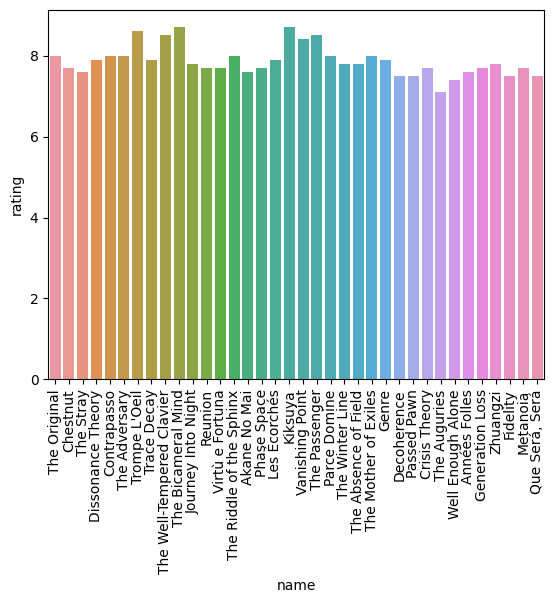

In [7]:
plt.Figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(x='name',y='rating',data=df, ci = None)
plt.show()

In [32]:
# ● Get all the episode names, whose average rating is more than 8 for every season
gr = df.groupby('name').filter(lambda s: s.rating.mean()>=8.0)

gr


,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>While Maeve convinces Felix to show her ""up...",{'self': {'href': 'https://api.tvmaze.com/epis...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,8.6,{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,8.5,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...
13,1440917,https://www.tvmaze.com/episodes/1440917/westwo...,The Riddle of the Sphinx,2,4,regular,2018-05-13,21:00,2018-05-14T01:00:00+00:00,71,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>William pays his recuperating father-in-law...,{'self': {'href': 'https://api.tvmaze.com/epis...
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,2018-06-11T01:00:00+00:00,60,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Another of Westworld's Host revolutionaries...,{'self': {'href': 'https://api.tvmaze.com/epis...
18,1459789,https://www.tvmaze.com/episodes/1459789/westwo...,Vanishing Point,2,9,regular,2018-06-17,21:00,2018-06-18T01:00:00+00:00,60,8.4,{'medium': 'https://static.tvmaze.com/uploads/...,<p>The Man learns that his grip on reality isn...,{'self': {'href': 'https://api.tvmaze.com/epis...
19,1459790,https://www.tvmaze.com/episodes/1459790/westwo...,The Passenger,2,10,regular,2018-06-24,21:00,2018-06-25T01:00:00+00:00,90,8.5,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>The Man faces a personal reckoning, while A...",{'self': {'href': 'https://api.tvmaze.com/epis...
